# Réalisation d'une ACP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## Lecture des données

In [2]:
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Potability_det', 'Unnamed: 0'], axis=1)
df_.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206


## 1) ACP

#### 1.2) Centrage des données

In [3]:
mean = df_.mean(axis=0)
df_centered = df_-mean
df_centered.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.001470,23.283927,136.277749,-1.257946,0.382429,-26.937999,-2.726858,45.912693,-0.972894
1,-0.298377,-2.736754,-8397.228893,-1.961534,-9.664684,52.398985,0.826890,-0.103225,-0.717131
2,-1.071647,-11.831753,-6133.762063,1.032235,88.092742,-110.925889,6.085443,17.208420,0.900134
3,1.015189,22.602101,-3962.050887,-0.936040,0.382429,-48.885899,3.517089,-6.589577,0.311929
4,0.990347,13.879445,-5230.971406,1.660471,26.122822,133.711872,3.034402,2.239471,1.115053


#### 1.3) Normalisation des données (MinMax & standardisation)

In [4]:
scaler_s = StandardScaler()
scaler_m = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_m.fit_transform(df_centered), columns=df_.columns)
df_standardized = pd.DataFrame(scaler_s.fit_transform(df_centered), columns=df_.columns)

#### 1.4) Réalisation de l'ACP

In [5]:
cls_normalized = PCA(n_components=9)
cls_standardized = PCA(n_components=9)
pcs_df_normalized = cls_normalized.fit_transform(df_normalized)
pcs_df_standardized = cls_standardized.fit_transform(df_standardized)

#### 1.5) Affichage de l'ACP normalisée

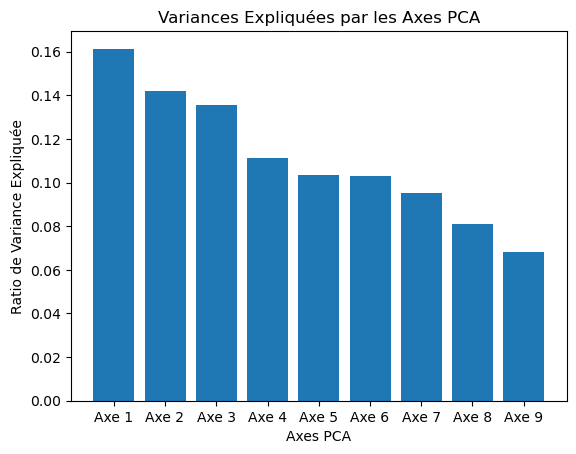

In [6]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5", "Axe 6", "Axe 7", "Axe 8", "Axe 9"], cls_normalized.explained_variance_ratio_)
plt.title("Variances Expliquées par les Axes PCA")
plt.ylabel("Ratio de Variance Expliquée")
plt.xlabel("Axes PCA")
plt.show()

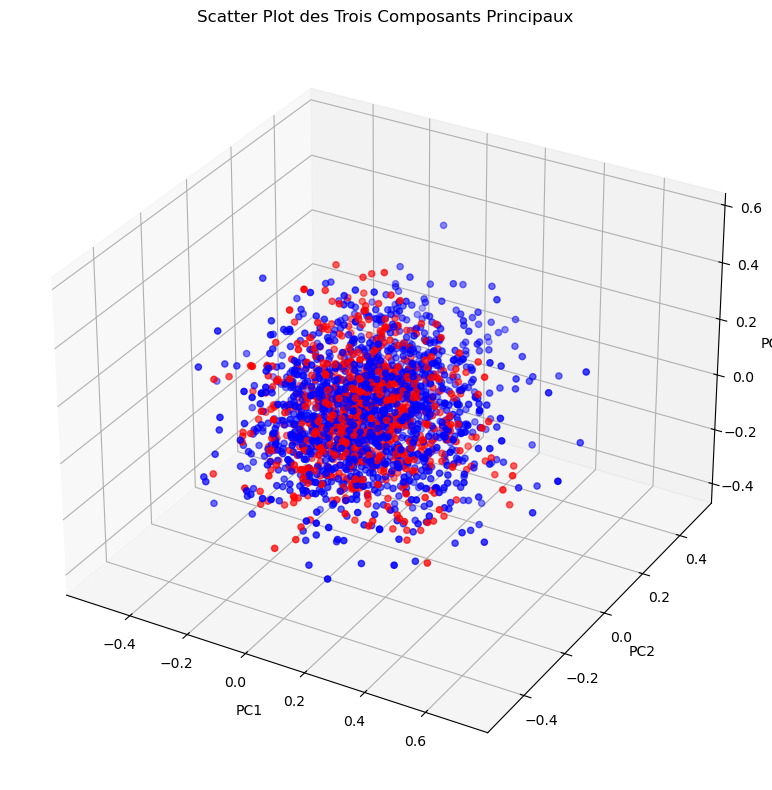

In [7]:
df_acp_normalized = pd.DataFrame(pcs_df_normalized, columns=[f"PC{i}" for i in range(1, 10)])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if potability == 1 else 'blue' for potability in df['Potability_det']]
ax.scatter(df_acp_normalized["PC1"], df_acp_normalized["PC2"], df_acp_normalized["PC3"], c=colors, marker='o')
plt.title("Scatter Plot des Trois Composants Principaux")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

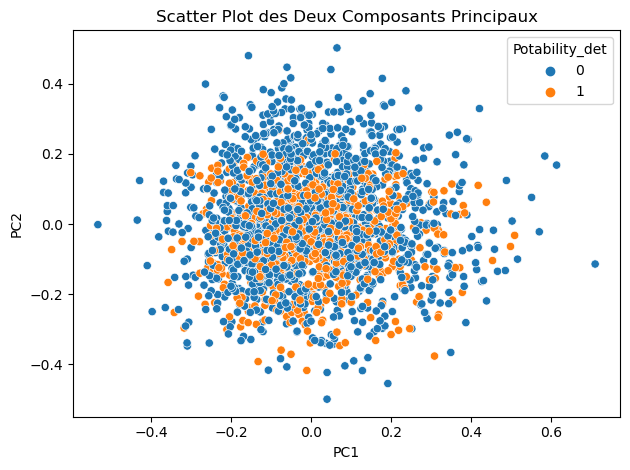

In [8]:
sns.scatterplot(x="PC1", y="PC2", hue=df.Potability_det, data=df_acp_normalized)
plt.title("Scatter Plot des Deux Composants Principaux")
plt.ylabel("PC2")
plt.xlabel("PC1")

plt.tight_layout()
plt.show()

#### 1.6) Affichage de l'ACP standardisée

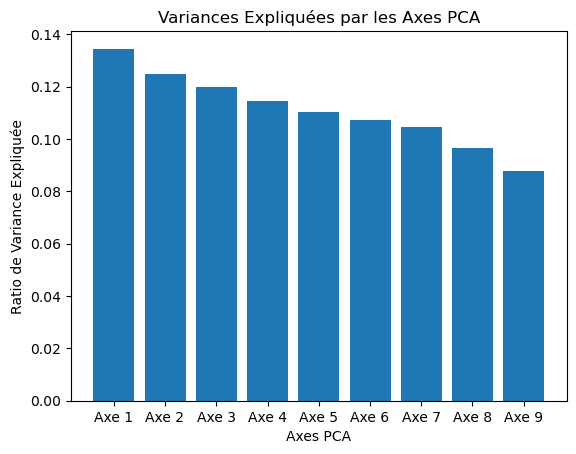

In [9]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5", "Axe 6", "Axe 7", "Axe 8", "Axe 9"], cls_standardized.explained_variance_ratio_)
plt.title("Variances Expliquées par les Axes PCA")
plt.ylabel("Ratio de Variance Expliquée")
plt.xlabel("Axes PCA")
plt.show()

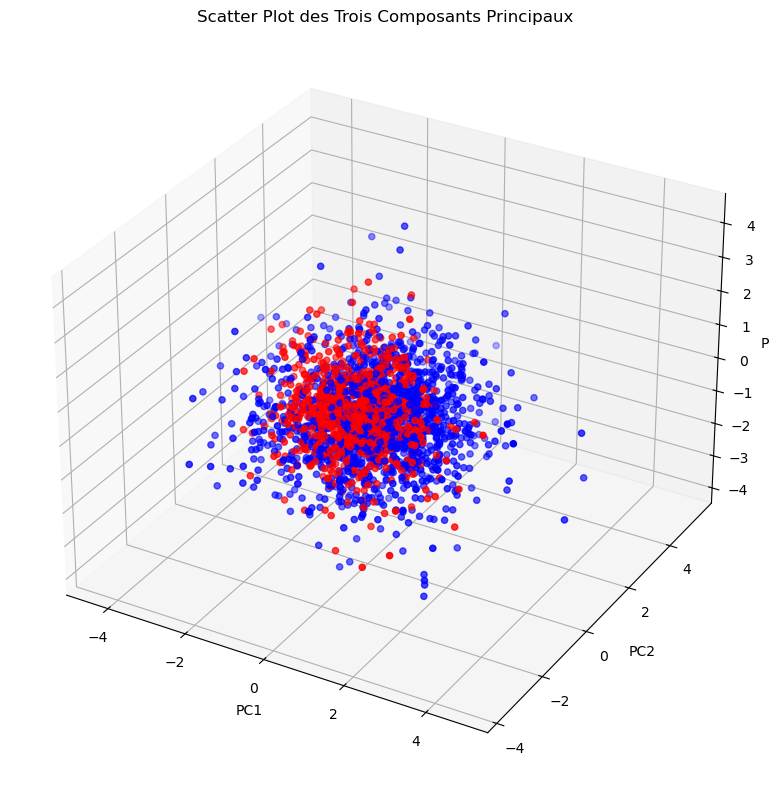

In [10]:
df_acp_standardized = pd.DataFrame(pcs_df_standardized, columns=[f"PC{i}" for i in range(1, 10)])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if potability == 1 else 'blue' for potability in df['Potability_det']]
ax.scatter(df_acp_standardized["PC1"], df_acp_standardized["PC2"], df_acp_standardized["PC3"], c=colors, marker='o')
plt.title("Scatter Plot des Trois Composants Principaux")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()

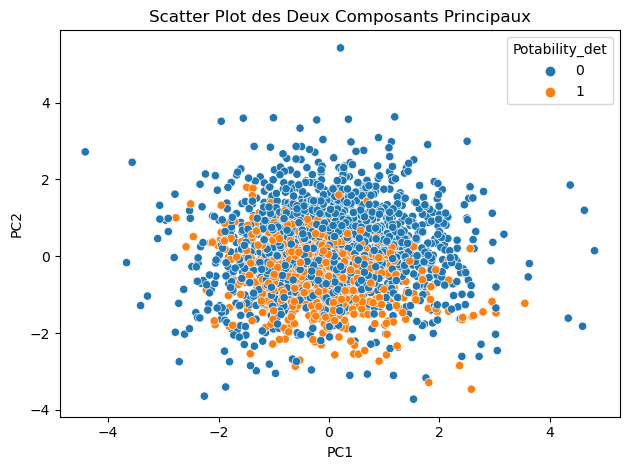

In [11]:
sns.scatterplot(x="PC1", y="PC2", hue=df.Potability_det, data=df_acp_standardized)
plt.title("Scatter Plot des Deux Composants Principaux")
plt.ylabel("PC2")
plt.xlabel("PC1")

plt.tight_layout()
plt.show()